# Machine Learning

*Екатерина Лобачева / Илья Щуров / Сергей Сметанин *

*Совместный бакалавриат НИУ ВШЭ и РЭШ, 2016-17 учебный год*

[Страница курса](http://math-info.hse.ru/2016-17/Machine_Learning)

## Домашнее задание №ML3

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*) и загрузить его на my.NES.

### Задача 1
В некотором царстве, в некотором государстве, банк Б выдаёт кредиты населению. Анализируя заявку на выдачу кредита с помощью алгоритмов машинного обучения (а именно, алгоритма классификации), банк пытается предсказать, вернёт ли заёмщик кредит, и в зависимости от результата одобряет или отклоняет заявку. Иногда в некотором царстве, некотором государстве, случаются экономические кризисы, во время которых банк минимизирует свои риски, стараясь выдавать кредиты только самым надёжным заёмщикам. Если же кризиса нет и экономика растёт, банк может позволить себе больше рисковать и выдавать кредиты более широкому кругу заёмщиков. На картинке ниже изображены ROC-кривые для двух алгоритмов классификации (здесь считается, что положительный класс — это «заёмщик вернёт кредит», а отрицательный класс — «не вернёт»). Площадь под кривыми одинакова. Какой из этих двух алгоритмов банк должен использовать во время кризиса? Ответ обосновать.

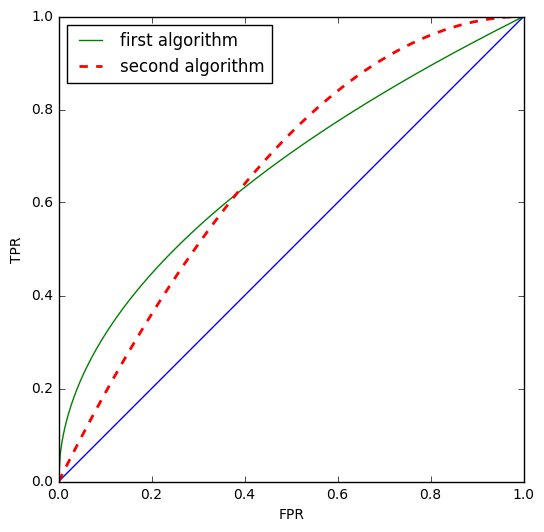

In [1]:
# код, рисующий картинку. для задачи он не важен.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 1, 300)
plt.figure(figsize=(6,6))
plt.plot(x, x)
plt.plot(x, np.sqrt(x), '-', label="first algorithm")
plt.plot(x, 1-(x-1)**2, '--', lw=2, label="second algorithm")
plt.legend(loc='best')
plt.ylabel("TPR")
plt.xlabel("FPR")

Во время кризиса для банка важно минимизировать $FP$, то есть $FPR$. Поэтому банк выберет 1ый алгоритм, поскольку при увеличении порога (движении по кривой ROC вниз влево) можно свести $FP$ почти к нулю, при этом получая ненулевой $TPR$.

### Задача 2
Основано на [этом дз](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/homeworks-theory/homework-theory-04-linclass.pdf). Алгоритм построения ROC-кривой подробно описан [здесь](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/sem05-linclass.pdf).

Пусть дана выборка $X$, состоящая из 8 объектов, и классификатор $b(x)$, предсказывающий оценку принадлежности объекта положительному классу (чем больше $b(x)$, тем больше уверенность, что объект $x$ принадлежит положительному классу). Предсказания $b(x)$ и реальные метки приведены ниже. Классификатор $a(x; t)$ относит объект $x$ к положительному классу, если $b(x) \ge t$, и к отрицательному классу в противном случае. Построить ROC-кривую и вычислить AUC-ROC для семейства классификаторов $a(x; t)$.

- $b(x_1)=0.1,\quad y_1=+1$;
- $b(x_2)=0.8,\quad y_2=+1$;
- $b(x_3)=0.2,\quad y_3=-1$;
- $b(x_4)=0.25,\quad y_4=-1$;
- $b(x_5)=0.9,\quad y_5=+1$;
- $b(x_6)=0.3,\quad y_6=+1$;
- $b(x_7)=0.6,\quad y_7=-1$;
- $b(x_8)=0.95,\quad y_8=+1$.

AUC-ROC =  0.6101000000000157


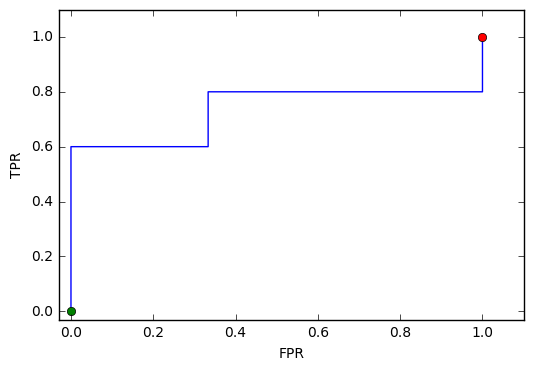

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

b = [ 0.1, 0.8, 0.2, 0.25, 0.9, 0.3, 0.6, 0.95]
y = [    1,    1,   -1,     -1,   1,    1,   -1,     1]
def A(x=0,t=0):
    if b[x] >= t:
        return 1
    else:
        return -1
    
def ROC(t=0):
    TP, FP, FN, TN =0.0,0.0,0.0,0.0
    
    for i in range(len(b)):
        if ((A(i,t) == 1) & (y[i] == 1)):
            TP+=1
        elif ((A(i,t) == 1) & (y[i] == -1)):
            FP+=1
        elif ((A(i,t) == -1) & (y[i] == -1)):
            TN+=1
        else:
            FN+=1
            
    if (FP+TN) == 0:
        if (TP+FN) ==0:
            return 0.0, 0.0
        else:
            return 0.0, TP/(TP+FN)
    else:
        return FP/(FP+TN), TP/(TP+FN)
    
X, Y= [], []
for t in range(10000):
    xi, yi = ROC(t/10000)
    X.append(xi)
    Y.append(yi)

axes = plt.gca()
axes.set_xlim([-0.03,1.1])
axes.set_ylim([-0.03,1.1])
plt.plot(X,Y)
plt.plot(0,0,'o')
plt.plot(1,1,'o')
plt.ylabel("TPR")
plt.xlabel("FPR")

AUC=0.0
for i in range(10000):
    xi, yi = ROC(i/10000)
    AUC+= (1/10000)*yi
    
print('AUC-ROC = ',AUC)

### Задача 3

В [csv-файле](http://math-info.hse.ru/f/2016-17/nes-ml/diabetes.csv) содержатся данные о пациентах. Требуется обучить логистическую регрессию, которая бы предсказывала, болен пациент диабетом или нет (переменная `diabet` имеет значение `+1`, если человек болен, и `-1`, если нет).

Загрузите файл с помощью `pandas.read_csv`, сформируйте обучающую и тестовую матрицы признаков `X_train`, `X_test` (разделите всю выборку в отношении 80/20) и векторы ответов `y_train`, `y_test` (можно использовать `sklearn.model_selection.train_test_split` (см. [документацию](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)), нормализуйте значения признаков с помощью [`sklearn.preprocessing.scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale), затем обучите логистическую регрессию (`sklearn.linear_model.LogisticRegression`) на обучающей выборке.

Обратите внимание, что в задачах диагностики цена ошибки false negative (не обнаружили, что человек болен диабетом, хотя он действительно болен, в результате не было дано адекватное лечение) гораздо выше цены ошибки false positive (в этом случае достаточно провести повторный анализ, который скорее всего укажет на отсутствие болезни).

Найдите confusion matrix для вашего алгоритма (на тестовой выборке). Найдите число ошибок каждого вида. Найдите TPR и FPR.

Метод `predict()` для объекта `LogisticRegression` относит каждый объект к тому классу, предсказанная вероятность которого для данного объекта больше предсказанной вероятности других классов. То есть для двухклассовой классификации это соответствует порогу $0.5$. На основании полученных выше данных, объясните, следует ли на ваш взгляд изменить порог, и если да, то в какую сторону?

Для вычисления confusion matrix вы можете использовать функцию `sklearn.metrics.confusion_matrix`, ей необходимо передать истинные классы и предсказанные классы. (О том, какая строка и какой столбец какому классу соответствует, лучше почитать в [документации](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).)

In [30]:
import pandas as pd
df=pd.read_csv("http://math-info.hse.ru/f/2016-17/nes-ml/neuro_class.csv")
class1, tmp=np.array(df[df.iloc[: , 2]==1]).shape
class0, tmp=np.array(df[df.iloc[: , 2]==0]).shape

import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn

X=np.array(df.iloc[:,0:2])
y=np.array(df.iloc[:, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sklearn.preprocessing.scale(X_train)
sklearn.preprocessing.scale(X_test)

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

preds = lr.predict(X_test)
predprobs = lr.predict_proba(X_test)
trueDistribution = class1/(class1+class0)
Variance = np.array((predprobs- trueDistribution)**2).mean()

M = sklearn.metrics.confusion_matrix(y_test, preds)
TP = M[0][0]
FP = M[0][1]
FN = M[1][0]
TN = M[1][1]
            
if (FP+TN) == 0:
    FPR = 0
else:
    FPR = FP/(FP+TN)
if (TP+FN) == 0:
    TPR = 0
else:
    TPR = TP/(TP+FN)
    

print( '\n',   M, '\n',  'TP=', TP, 
      'FP=', FP, ' FN=', FN, ' TN=', TN, '\n', 'TPR=', TPR, ' FPR=', FPR, '\n', 'Prediction variance:', Variance)

#print ('\n', preds)


 [[  0  56]
 [  0 124]] 
 TP= 0 FP= 56  FN= 0  TN= 124 
 TPR= 0  FPR= 0.311111111111 
 Prediction variance: 0.0535747089595


Дисперсия предсказанной вероятности очень мала, а значит наши параметры почти не коррелированы с классами и все пациенты относятся к группе с диабетом. Это, конечно, не создает проблем с ошибками второго рода, которых нам точно надо избежать, но и ничем не помогает улучшить эффективность здравоохранительной системы.